In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Load dataset
df = pd.read_csv('../customer_support_tickets_dirty.csv')

In [67]:
# Display first few rows
df.head(5)

,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice


In [68]:
# Dimensionality of the dataset
df.shape

(520, 4)

In [69]:
# Features of the ddataset
df.columns.tolist()

['text', 'label', 'ticket_id', 'agent_name']

In [70]:
# Investigate the dataset for annomalies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB


In [71]:
# Numerical statistical summary
df.describe()

,ticket_id
count,520.000000
mean,1259.500000
std,150.255338
min,1000.000000
25%,1129.750000
50%,1259.500000
75%,1389.250000
max,1519.000000


In [72]:
# Categorical statistical summary
df.describe(include=['object', 'bool'])

,text,label,agent_name
count,495,495,520
unique,180,16,4
top,Do you offer discounts for students or NGOs?,Accnt,Alice
freq,16,42,140


In [73]:
# Investigate missing values
null_vals = df.isnull().sum()
null_vals


text          25
label         25
ticket_id      0
agent_name     0
dtype: int64

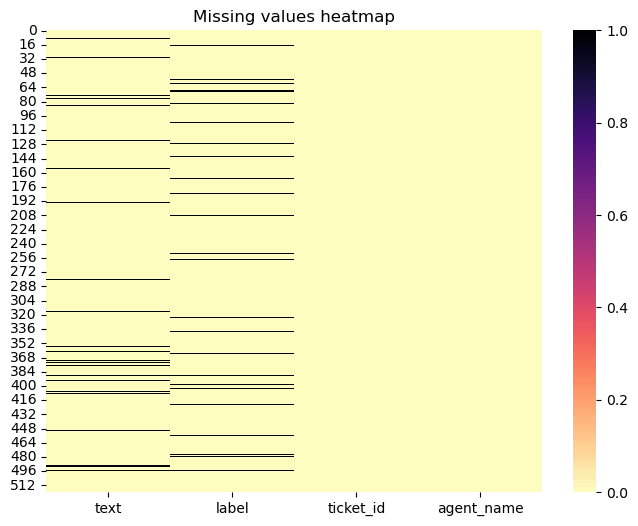

In [74]:
# visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='magma_r')
plt.title('Missing values heatmap')
plt.show()



Missing values per column:
text          25
label         25
ticket_id      0
agent_name     0
dtype: int64


C:\Users\baahc\AppData\Local\Temp\ipykernel_26468\3278791620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_vals.index, y=null_vals.values, palette='magma')


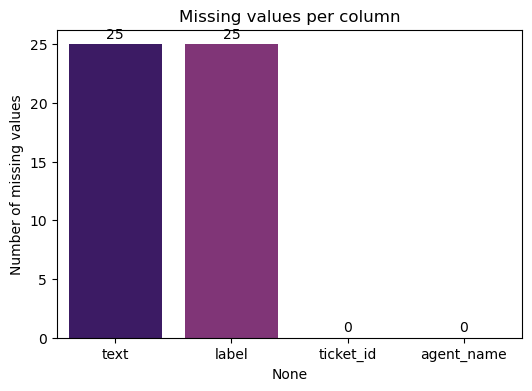

In [76]:
# show counts and a bar plot of missing values per column (where missing values exist)
print("Missing values per column:")
print(null_vals)

plt.figure(figsize=(6, 4))
sns.barplot(x=null_vals.index, y=null_vals.values, palette='magma')
plt.ylabel('Number of missing values')
plt.title('Missing values per column')
for i, v in enumerate(null_vals.values):
    plt.text(i, v + 0.5, str(int(v)), ha='center')
plt.show()

In [83]:
# Display where missing data exixts in the dataset
df[df.isnull()].any(axis=1)

9      False
17     False
30     False
55     False
60     False
67     False
68     False
69     False
73     False
76     False
82     False
84     False
103    False
104    False
124    False
127    False
142    False
155    False
166    False
183    False
194    False
208    False
251    False
258    False
280    False
316    False
323    False
339    False
356    False
361    False
363    False
371    False
374    False
377    False
388    False
394    False
398    False
403    False
406    False
408    False
421    False
450    False
456    False
477    False
479    False
490    False
491    False
495    False
dtype: bool

In [84]:
# Display where missing data exixts in the dataset. Method 2
df[df.isnull().any(axis=1)]

,text,label,ticket_id,agent_name
9,NaN,account,1009,Dana
17,Integration with Zapier fails with timeout.,NaN,1017,Charlie
30,NaN,billing,1030,Charlie
55,Integration with QuickBooks fails with timeout.,NaN,1055,Dana
60,Currency converted incorrectly; expected EUR.,NaN,1060,Alice
67,Can I migrate data from Freshdesk?,NaN,1067,Dana
68,NaN,Account,1068,Dana
69,Username sam.dev already taken but it's my old...,NaN,1069,Alice
73,NaN,account,1073,Charlie
76,NaN,BILLING,1076,Charlie


In [86]:
# Drop rows with missing values in 'Issue Description' column
df.dropna(inplace=True)

In [88]:
# Check that missing values have been handled
df.isnull().sum()

text          0
label         0
ticket_id     0
agent_name    0
dtype: int64

In [90]:
df.head(5)

,text,label,ticket_id,agent_name
